Housing Example

Checking all the packages installed using a Housing example.

Data is downloaded from the given site in compressed form(tgz). This file is unzipped and stored as a comma separated file(csv) in a directory called datasets.

In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

Pandas is used to load the data. The function below returns a DataFrame object containing all the data.

In [2]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    fetch_housing_data(HOUSING_URL,HOUSING_PATH)
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing is a DataFrame object containing all the data. Function head() returns first 5 rows of data table.

In [3]:
housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

Function info() gives the description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Function describe() gives a summary of the numerical attributes. The null values are ignored.

In [5]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

Function tail() returns the last 5 rows of the data

In [11]:
housing.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

A histogram can be plotted for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). 
Matplotlib is a package which helps in plotting the histogram. It contains a function called hist() which plots the histogram for all the numeric attributes.

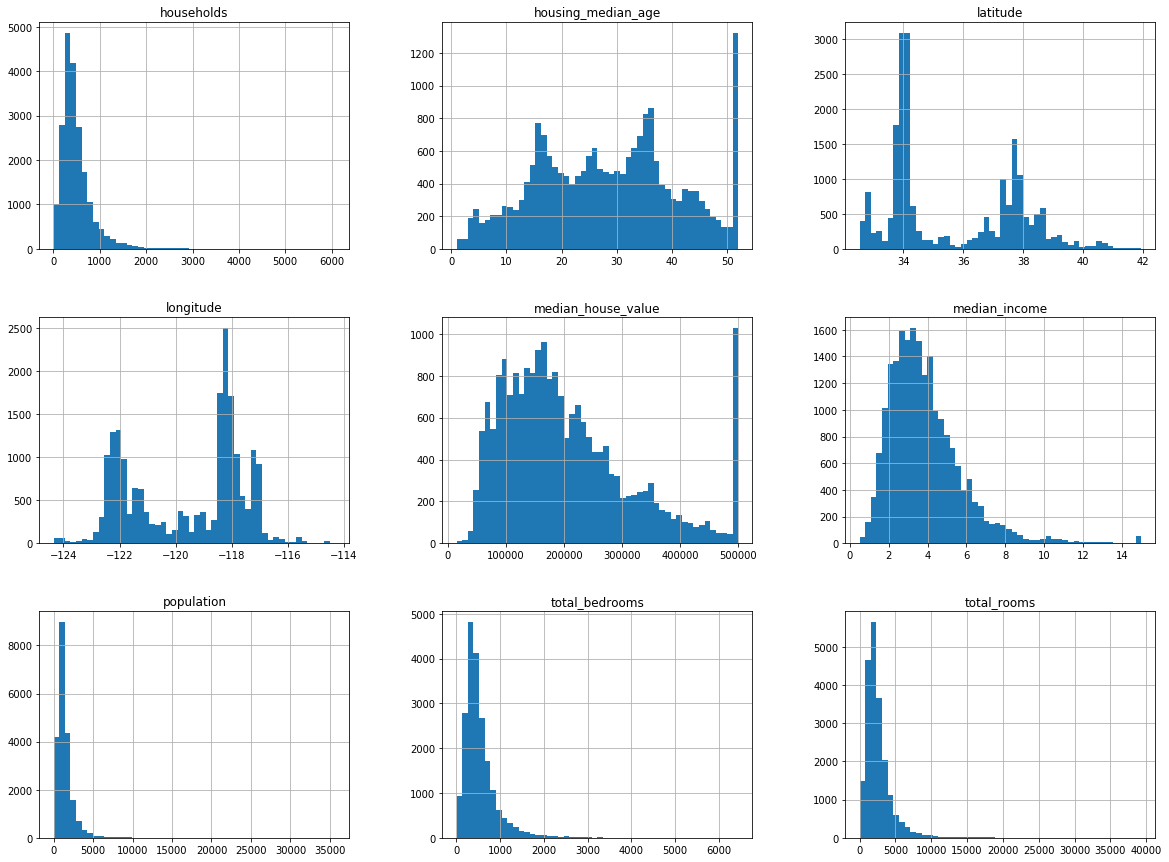

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

A histogram can be plotted for a specific numeric attribute also using the function hist() like the one below.

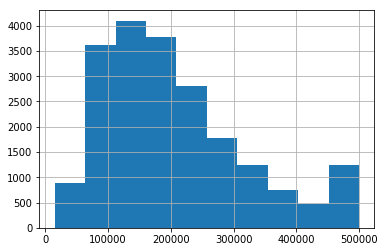

In [13]:
housing["median_house_value"].hist()

ocean_proximity is an attribute of type object. Since its a csv file, it must be a text attribute. It is a categorical attribute as its values look repetitive in the data. All the categories of that attribute can be found using the value_counts() function.

In [8]:
print(housing["ocean_proximity"].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


For the attribute median_income, a histogram and its summary is given below as follws. 

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64


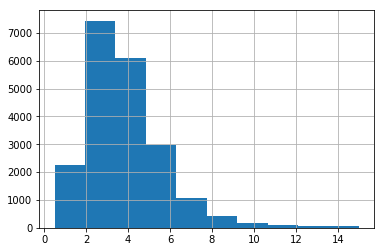

In [14]:
print(housing["median_income"].describe())
housing["median_income"].hist()

Scikit-learn contains a function called train_test_split() which is used to divide the data into 2 sets namely training set and test set. It uses random state as an identifier to divide the dataset. Test size denotes the size of data used for testing in terms of percentage.  

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(train_set.describe())
print("\nTraining Percentages:\n")
print(train_set.count()/housing.count())

          longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean    -119.582290     35.643149           28.608285   2642.004784   
std        2.005654      2.136665           12.602499   2174.646744   
min     -124.350000     32.550000            1.000000      2.000000   
25%     -121.810000     33.930000           18.000000   1454.000000   
50%     -118.510000     34.260000           29.000000   2129.000000   
75%     -118.010000     37.720000           37.000000   3160.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    16512.000000  16512.000000  16512.000000   16512.000000   
mean       538.496851   1426.453004    499.986919       3.880754   
std        419.007096   1137.056380    380.967964       1.904294   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.75000

Scatter plots can also be created from the data

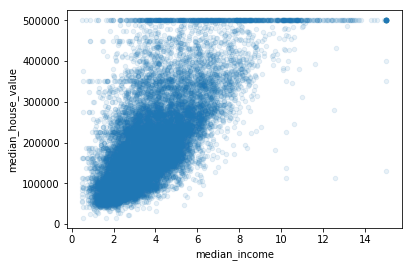

In [10]:
train_set.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)